In [2]:
################## THE DOT PRODUCT ####################
import numpy as np
import matplotlib.pyplot as plt  

# vectors:
v1 = np.array([ 1,2,3,4,5 ])
v2 = np.array([ 0,-4,-3,6,5 ])

# there are 4+ ways to implement the computation

dp1 = sum(np.multiply(v1,v2)) # direct impl, elementwise mult and sum it all

# Recommended implementation in practice:
dp2 = np.dot(v1,v2) # use np.dot() method 

dp3 = np.matmul(v1,v2) # matrix multiplication

# method 4 - loop version - not done in practice, for demo purposes only
dp4 = 0 # initialize
# loop over els
for i in range(0,len(v1)):
    dp4 = dp4 + v1[i]*v2[i] # mult and add up in the loop

print(dp1,dp2,dp3,dp4) # 32 for all cases

32 32 32 32


In [3]:
########### PROPERTIES OF THE DOT PRODUCT ###############

### The Distributive Property

# create 3 random vectors
n = 10 # dimension 10
a = np.random.randn(n) # n is how many random nums to generate in an array
b = np.random.randn(n)
c = np.random.randn(n)

res1 = np.dot( a, (b+c) ) # a * (b+c)
res2 = np.dot(a,b) + np.dot(a,c) # ab + ac

print([ res1, res2 ]) # results will be the same showing distributive property holds

[6.268278187414763, 6.268278187414763]


In [4]:
### The dot product is not Associative

n = 5
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

res1 = np.dot( a, np.dot(b,c) ) # a * (bc)
res2 = np.dot( np.dot(a,b), c ) # (ab) * c - move the parens

# The results will not match since the associative property does not hold with the dot product
print(res1)
print(res2)

[-2.03756443 -0.2177473  -1.89706259  0.27373294 -1.37905852]
[-1.87200813  0.05115235 -1.13048932 -0.53072756  0.82537807]


In [5]:
#### The Dot Product is Commutative ####

# 100 element vectors
a = np.random.randn(100)
b = np.random.randn(100)

# compute dot products of a and b and b and a
dp_ab = np.dot(a,b)
dp_ba = np.dot(b,a)

# show that the dot products are the same and therefore commutative
print(dp_ab,dp_ba,dp_ab-dp_ba)
print(' ')

# example with regular lists of numbers
v = [2,4]
w = [3,5]
print(np.dot(v,w),np.dot(w,v))

-3.237136194999379 -3.237136194999379 0.0
 
26 26


In [6]:
### Computing the Length of a Vector ###

# length is the square root of the dot product of a vector with itself

v1 = np.array([ 1,2,3,4,5,6 ])

# use the .norm() function
vl = np.linalg.norm(v1)

print(vl) # the length

9.539392014169456


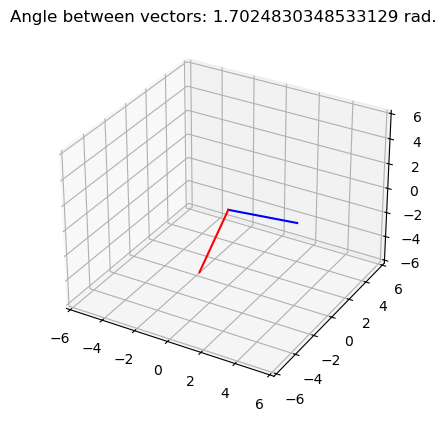

In [7]:


# two 3-D vectors
v1 = np.array([ 2,4,-3 ])
v2 = np.array([ 0,-3,-3 ])

# compute the angle between the two vectors:
# the inverse of  cosine (arccosine) of the dot product between the two vectors scaled by the product of the norms(lengths) of the two vectors
ang = np.arccos( np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)) ) # the angle in Radians! 1.7 is a little over 90 deg


# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]],'b')
ax.plot([0,v2[0]],[0,v2[1]],[0,v2[2]],'r')

plt.axis((-6, 6, -6, 6, -6, 6))
plt.title('Angle between vectors: %s rad.' %ang)
plt.show()

# The angle between these vectors is approaching 90 deg and they are pretty much orthogonal

In [8]:
#### Equivalance of algebraic and geometric dot product formulas

v1 = np.array([2,4,-3])
v2 = np.array([0,-3,-3])

# algebraic formula
dp_a = np.dot(v1,v2)

# geometric formula
# the norm (length) of vector 1 times the norm of vector 2 times the cosine of the angle between the two vectors 
dp_g = np.linalg.norm(v1)*np.linalg.norm(v2)*np.cos(ang)

print(dp_a)
print(dp_g)

# should be equal to 3 (basically given rounding errors)

-3
-3.0000000000000013


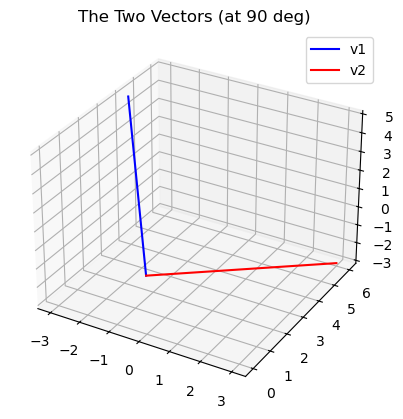

Original dot product: 0


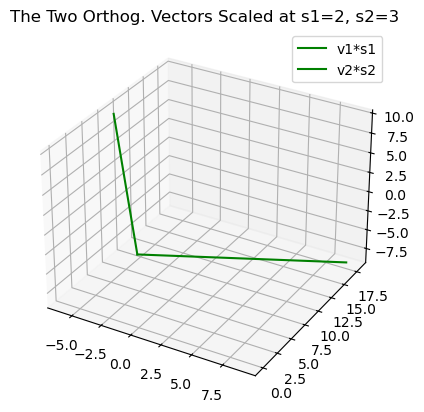

Scaled dot product (still zero for orthog.): 0


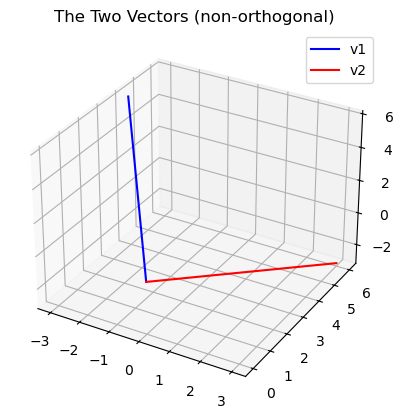

Original dot product (Non-Orthogonal): -3


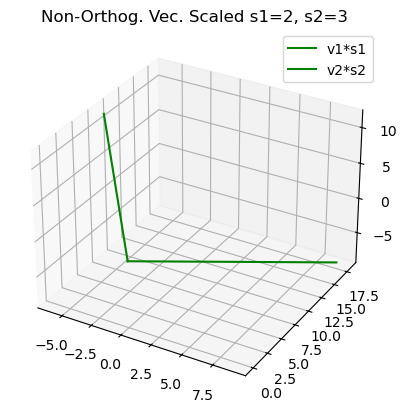

Scaled dot product (negative - obtuse): -18


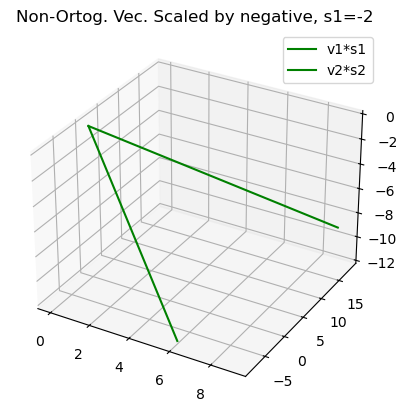

Scaled dot product (positive - acute): 18


In [9]:
###### THE RELATIONSHIP OF THE SIGN OF THE DOT PRODUCT AS AFFECTED BY SCALAR MULTIPLICATION ####

### What happens to the dot product of two vectors, when those vectors get scaled by some scalar?

# 2 3-d vectors at right angle
v1 = np.array([-3,4,5])
v2 = np.array([3,6,-3])

# scalars to multiply the vectors by:
s1 = 2
s2 = 3

# these vectors are at right angle to each other (orthogonal)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]],'b', label='v1')
ax.plot([0,v2[0]],[0,v2[1]],[0,v2[2]],'r', label='v2')
plt.legend()
plt.title('The Two Vectors (at 90 deg)')
plt.show()

# dot product of vectors (no multiplying by scalars):
print('Original dot product: ' + str(np.dot(v1,v2))) # 0


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v1[0]*s1],[0,v1[1]*s1],[0,v1[2]*s1],'g', label='v1*s1')
ax.plot([0,v2[0]*s2],[0,v2[1]*s2],[0,v2[2]*s2],'g', label='v2*s2')
plt.legend()
plt.title(f'The Two Orthog. Vectors Scaled at {s1=}, {s2=}')
plt.show()

#### Showing that orthogonal vectors (at 90 deg to each other) result in 0 when negative numbers involved
# scaled with scalars:
print('Scaled dot product (still zero for orthog.): ' + str(np.dot(s1*v1, s2*v2))) # 0

##################################################################################
# Non-orthogonal vectors to show affects of scalar multiplication on dot product #
##################################################################################

v1 = np.array([-3,4,6]) # change 5 to 6 to make it non-orthogonal
v2 = np.array([3,6,-3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]],'b', label='v1')
ax.plot([0,v2[0]],[0,v2[1]],[0,v2[2]],'r', label='v2')
plt.legend()
plt.title('The Two Vectors (non-orthogonal)')
plt.show()

print('Original dot product (Non-Orthogonal): ' + str(np.dot(v1,v2))) # -3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v1[0]*s1],[0,v1[1]*s1],[0,v1[2]*s1],'g', label='v1*s1')
ax.plot([0,v2[0]*s2],[0,v2[1]*s2],[0,v2[2]*s2],'g', label='v2*s2')
plt.legend()
plt.title(f'Non-Orthog. Vec. Scaled {s1=}, {s2=}')
plt.show()

# result of scaled dot product is negative
print('Scaled dot product (negative - obtuse): ' + str(np.dot(s1*v1, s2*v2))) # -18


s1 = -2
s2 = 3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,v1[0]*s1],[0,v1[1]*s1],[0,v1[2]*s1],'g', label='v1*s1')
ax.plot([0,v2[0]*s2],[0,v2[1]*s2],[0,v2[2]*s2],'g', label='v2*s2')
plt.legend()
plt.title(f'Non-Ortog. Vec. Scaled by negative, {s1=}')
plt.show()

# result of scaled dot product is positive with a negative scalar 1
print('Scaled dot product (positive - acute): ' + str(np.dot(s1*v1, s2*v2))) # 18

In [ ]:
################ THE OUTER PRODUCT ###############

# Alternative to dot product (the inner product) way of multiplying vectors
v1 = np.array([1,2,3])
v2 = np.array([-1,0,1]) # Note outer product would work with different size vectors as well

# compute outer product with np.outer:
outer_product_np = np.outer(v1,v2)

# just for demo purposes - this is an implementation of the element wise formula for computing the dot product:
# in practice, just use np.outer() as above
outer_product = np.zeros((len(v1),len(v1))) # init for loops

for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        outer_product[i,j] = v1[i] * v2[j]

print(outer_product)
print(outer_product_np) # using np - should be same as manual impl./

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]
[[-1  0  1]
 [-2  0  2]
 [-3  0  3]]
